In [37]:
# Dependencies
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import linregress
import scipy.stats as st

In [2]:
#supressing scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# Make a reference to the blockbusters.csv file path
file_one = Path("Resources/blockbusters.csv")

# Import the blockbusters.csv file as a DataFrame
movies_df = pd.read_csv(file_one, encoding="utf-8")

# Check the information has been imported correctly
movies_df.tail()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
432,Thriller,Crime,Comedy,7.10,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"$41,833,347.00",1975
433,Music,Drama,Comedy,6.40,136,7,PG,Columbia Pictures,Funny Lady,"$39,000,000.00",1975
434,Family,Western,Comedy,6.20,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"$36,853,000.00",1975
435,Drama,NaN,NaN,6.00,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","$35,000,000.00",1975
436,Drama,Western,War,6.40,103,10,PG,Universal Pictures,The Other Side of the Mountain,"$34,673,100.00",1975


In [3]:
#rename Columns in the DF with subgenres (keep for later!)
movies_df = movies_df.rename(columns={'Main_Genre': 'Main Genre', 'Genre_2': 'Subgenre 1', 'Genre_3': 'Subgenre 2', 'imdb_rating': 'IMDB Rating', 'length': 'Length', 'rank_in_year': 'Rank In Year', 'rating': 'Rating', 'studio': 'Production Studio', 'title': 'Movie Title', 'worldwide_gross': 'Worldwide Gross', 'year': 'Year'})

#delete the subgenre columns
clean_df = movies_df.drop(['Subgenre 1', 'Subgenre 2'], axis=1)

clean_df

,Main Genre,IMDB Rating,Length,Rank In Year,Rating,Production Studio,Movie Title,Worldwide Gross,Year
0,Action,7.40,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,8.50,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,7.80,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,6.20,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,7.80,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
...,...,...,...,...,...,...,...,...,...
432,Thriller,7.10,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"$41,833,347.00",1975
433,Music,6.40,136,7,PG,Columbia Pictures,Funny Lady,"$39,000,000.00",1975
434,Family,6.20,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"$36,853,000.00",1975
435,Drama,6.00,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","$35,000,000.00",1975


In [4]:
#focus on the Main Genre for the dataset so that we have a large data set
grouped_df = clean_df.groupby('Year')['Main Genre'].value_counts()
grouped_df

Year  Main Genre
1975  Drama         3
      Family        1
      Music         1
      Romance       1
      Thriller      1
                   ..
2017  Horror        1
      Music         1
2018  Action        8
      Animation     1
      Music         1
Name: Main Genre, Length: 265, dtype: int64

In [5]:
production_df = clean_df['Production Studio'].value_counts()
production_df

Warner Bros                      87
Walt Disney Pictures             65
Paramount Pictures               58
Universal Pictures               56
20th Century Fox                 48
Columbia Pictures                36
Metro-Goldwyn-Mayer              34
Sony Pictures                    17
DreamWorks                       12
Lionsgate Films                  10
Pixar                             9
Newmarket Films                   1
IFC Films                         1
Embassy Pictures                  1
National Air and Space Museum     1
Sunn Classic Pictures             1
Name: Production Studio, dtype: int64

In [6]:
#change the Worldwide Gross column type to numeric
clean_df['Worldwide Gross'] = clean_df['Worldwide Gross'].str.replace('$', '').str.replace(',', '')
clean_df['Worldwide Gross'] = pd.to_numeric(clean_df['Worldwide Gross'])
clean_df

/var/folders/w4/98f2t0sx0bx10pqb3r31kc0h0000gn/T/ipykernel_26260/2167410920.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_df['Worldwide Gross'] = clean_df['Worldwide Gross'].str.replace('$', '').str.replace(',', '')


,Main Genre,IMDB Rating,Length,Rank In Year,Rating,Production Studio,Movie Title,Worldwide Gross,Year
0,Action,7.40,135,1,PG-13,Walt Disney Pictures,Black Panther,"700,059,566.00",2018
1,Action,8.50,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"678,815,482.00",2018
2,Animation,7.80,118,3,PG,Pixar,Incredibles 2,"608,581,744.00",2018
3,Action,6.20,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"416,769,345.00",2018
4,Action,7.80,119,5,R,20th Century Fox,Deadpool 2,"318,491,426.00",2018
...,...,...,...,...,...,...,...,...,...
432,Thriller,7.10,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"41,833,347.00",1975
433,Music,6.40,136,7,PG,Columbia Pictures,Funny Lady,"39,000,000.00",1975
434,Family,6.20,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"36,853,000.00",1975
435,Drama,6.00,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","35,000,000.00",1975


In [7]:
#look for the top 10 highest grossing movies between 1975 and 2018
highest_gross = clean_df.nlargest(10, 'Worldwide Gross')

#add the $ back into the column
highest_gross["Worldwide Gross"] = highest_gross["Worldwide Gross"].map("${:,.2f}".format)
highest_gross

,Main Genre,IMDB Rating,Length,Rank In Year,Rating,Production Studio,Movie Title,Worldwide Gross,Year
90,Fantasy,7.90,162,1,PG-13,20th Century Fox,Avatar,"$2,749,064,328.00",2009
210,Romance,7.70,194,1,PG-13,Paramount Pictures,Titanic,"$1,843,201,268.00",1997
60,Sci-Fi,8.20,143,1,PG-13,Walt Disney Pictures,The Avengers,"$1,518,594,910.00",2012
70,Thriller,8.10,130,1,PG-13,Warner Bros,Harry Potter and the Deathly Hallows - Part 2,"$1,341,511,219.00",2011
50,Comedy,7.70,102,1,PG,Walt Disney Pictures,Frozen,"$1,274,219,009.00",2013
51,Sci-Fi,7.30,130,2,PG-13,Walt Disney Pictures,Iron Man 3,"$1,215,439,994.00",2013
71,Sci-Fi,6.30,154,2,PG-13,Paramount Pictures,Transformers: Dark of the Moon,"$1,123,794,079.00",2011
150,Fantasy,8.90,201,1,PG-13,Warner Bros,The Lord of the Rings: The Return of the King,"$1,119,929,521.00",2003
61,Thriller,7.80,143,2,PG-13,Metro-Goldwyn-Mayer,Skyfall,"$1,108,561,013.00",2012
40,Sci-Fi,5.80,165,1,PG-13,Paramount Pictures,Transformers: Age of Extinction,"$1,091,404,499.00",2014


In [8]:
highest_gross.reset_index()

,index,Main Genre,IMDB Rating,Length,Rank In Year,Rating,Production Studio,Movie Title,Worldwide Gross,Year
0,90,Fantasy,7.90,162,1,PG-13,20th Century Fox,Avatar,"$2,749,064,328.00",2009
1,210,Romance,7.70,194,1,PG-13,Paramount Pictures,Titanic,"$1,843,201,268.00",1997
2,60,Sci-Fi,8.20,143,1,PG-13,Walt Disney Pictures,The Avengers,"$1,518,594,910.00",2012
3,70,Thriller,8.10,130,1,PG-13,Warner Bros,Harry Potter and the Deathly Hallows - Part 2,"$1,341,511,219.00",2011
4,50,Comedy,7.70,102,1,PG,Walt Disney Pictures,Frozen,"$1,274,219,009.00",2013
5,51,Sci-Fi,7.30,130,2,PG-13,Walt Disney Pictures,Iron Man 3,"$1,215,439,994.00",2013
6,71,Sci-Fi,6.30,154,2,PG-13,Paramount Pictures,Transformers: Dark of the Moon,"$1,123,794,079.00",2011
7,150,Fantasy,8.90,201,1,PG-13,Warner Bros,The Lord of the Rings: The Return of the King,"$1,119,929,521.00",2003
8,61,Thriller,7.80,143,2,PG-13,Metro-Goldwyn-Mayer,Skyfall,"$1,108,561,013.00",2012
9,40,Sci-Fi,5.80,165,1,PG-13,Paramount Pictures,Transformers: Age of Extinction,"$1,091,404,499.00",2014


In [9]:
highest_gross["Movie Title"].values

array(['Avatar', 'Titanic', 'The Avengers',
       'Harry Potter and the Deathly Hallows - Part 2', 'Frozen',
       'Iron Man 3', 'Transformers: Dark of the Moon',
       'The Lord of the Rings: The Return of the King', 'Skyfall',
       'Transformers: Age of Extinction'], dtype=object)

In [10]:
sorted_data = highest_gross.sort_values('Worldwide Gross', ascending=True)
sorted_data

,Main Genre,IMDB Rating,Length,Rank In Year,Rating,Production Studio,Movie Title,Worldwide Gross,Year
40,Sci-Fi,5.80,165,1,PG-13,Paramount Pictures,Transformers: Age of Extinction,"$1,091,404,499.00",2014
61,Thriller,7.80,143,2,PG-13,Metro-Goldwyn-Mayer,Skyfall,"$1,108,561,013.00",2012
150,Fantasy,8.90,201,1,PG-13,Warner Bros,The Lord of the Rings: The Return of the King,"$1,119,929,521.00",2003
71,Sci-Fi,6.30,154,2,PG-13,Paramount Pictures,Transformers: Dark of the Moon,"$1,123,794,079.00",2011
51,Sci-Fi,7.30,130,2,PG-13,Walt Disney Pictures,Iron Man 3,"$1,215,439,994.00",2013
50,Comedy,7.70,102,1,PG,Walt Disney Pictures,Frozen,"$1,274,219,009.00",2013
70,Thriller,8.10,130,1,PG-13,Warner Bros,Harry Potter and the Deathly Hallows - Part 2,"$1,341,511,219.00",2011
60,Sci-Fi,8.20,143,1,PG-13,Walt Disney Pictures,The Avengers,"$1,518,594,910.00",2012
210,Romance,7.70,194,1,PG-13,Paramount Pictures,Titanic,"$1,843,201,268.00",1997
90,Fantasy,7.90,162,1,PG-13,20th Century Fox,Avatar,"$2,749,064,328.00",2009


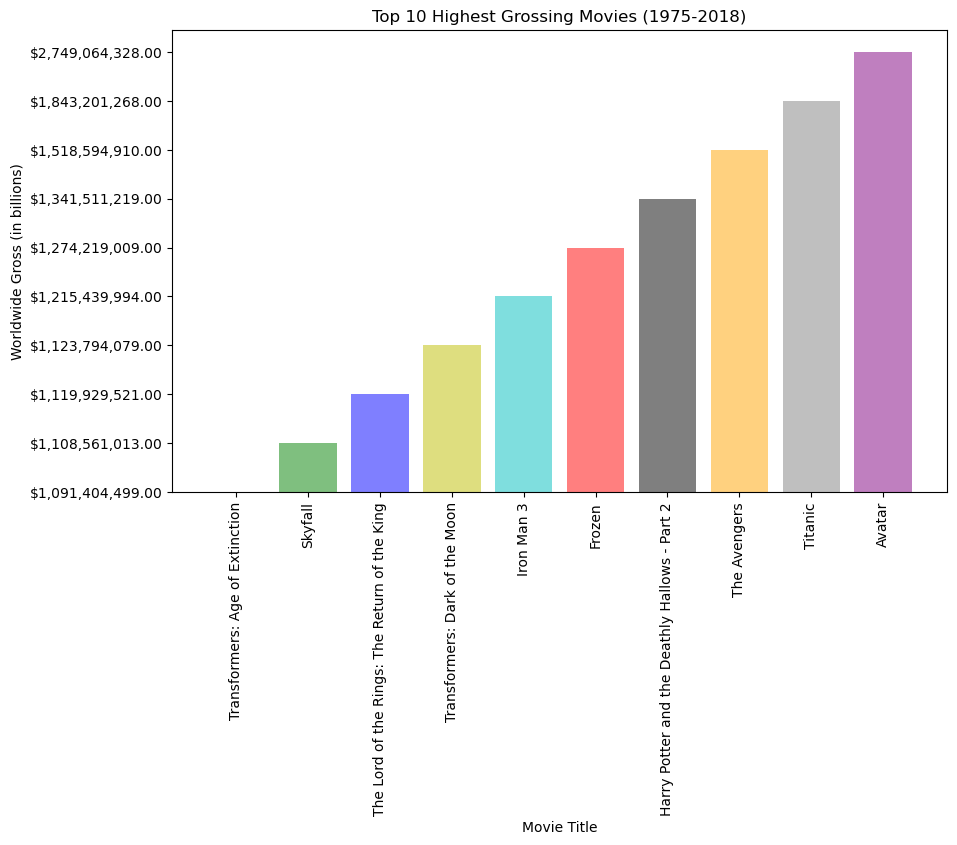

In [11]:
#Plot bar showing the highest Worldwide Gross and the movies
# sort the data by worldwide gross and create x_axis and y_axis
sorted_data = highest_gross.sort_values('Worldwide Gross', ascending=True)
x_axis = sorted_data['Movie Title']
y_axis = sorted_data['Worldwide Gross']

# create a list of custom colors with the same length as x_axis
colors = ['m', 'g', 'b', 'y', 'c', 'r', 'k', 'orange', 'gray', 'purple']

fig, ax = plt.subplots(figsize=(10, 6)) 
ax.bar(x_axis, y_axis, color=colors, alpha=0.5, align="center")

# set the title and axis labels
ax.set_title("Top 10 Highest Grossing Movies (1975-2018)")
ax.set_xlabel("Movie Title")
ax.set_ylabel("Worldwide Gross (in billions)")

# set the tick labels to be vertical and spaced out
ax.set_xticks(range(len(x_axis)))
ax.set_xticklabels(x_axis, rotation=90)


plt.show() # show the plot


In [12]:
#For the production companies from 1975-2018
production = clean_df['Production Studio'].value_counts()
production

Warner Bros                      87
Walt Disney Pictures             65
Paramount Pictures               58
Universal Pictures               56
20th Century Fox                 48
Columbia Pictures                36
Metro-Goldwyn-Mayer              34
Sony Pictures                    17
DreamWorks                       12
Lionsgate Films                  10
Pixar                             9
Newmarket Films                   1
IFC Films                         1
Embassy Pictures                  1
National Air and Space Museum     1
Sunn Classic Pictures             1
Name: Production Studio, dtype: int64

In [13]:
#Show the Top 10 highest prodution companies from 1975-2018
highest_production = clean_df['Production Studio'].value_counts().nlargest(10)
highest_production

Warner Bros             87
Walt Disney Pictures    65
Paramount Pictures      58
Universal Pictures      56
20th Century Fox        48
Columbia Pictures       36
Metro-Goldwyn-Mayer     34
Sony Pictures           17
DreamWorks              12
Lionsgate Films         10
Name: Production Studio, dtype: int64

In [14]:
highest_production.value_counts

<bound method IndexOpsMixin.value_counts of Warner Bros             87
Walt Disney Pictures    65
Paramount Pictures      58
Universal Pictures      56
20th Century Fox        48
Columbia Pictures       36
Metro-Goldwyn-Mayer     34
Sony Pictures           17
DreamWorks              12
Lionsgate Films         10
Name: Production Studio, dtype: int64>

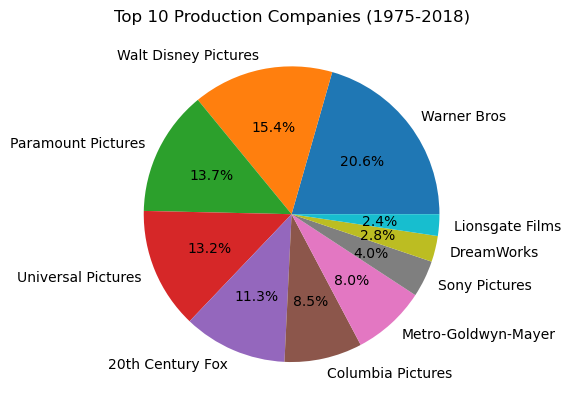

In [15]:
# Generate a pie plot showing the top 10 production companies
plt.pie(highest_production.values, labels=highest_production.index.values, autopct="%1.1f%%")
plt.title("Top 10 Production Companies (1975-2018)")
plt.show()

In [16]:
#production company we will use a scatter plot with trendline x axis = production company and y axis = how much money was made 

In [17]:
#make a DF for each 11 year span in the 1975-2018
#set 1 1975-1985 
start_1 = 1975
end_1 = start_1 + 11
df_1 = clean_df.loc[(clean_df['Year'] >= start_1) & (clean_df['Year'] < end_1)]

#set 2 1986-1996
start_2 = 1986
end_2 = start_2 + 11
df_2 = clean_df.loc[(clean_df['Year'] >= start_2) & (clean_df['Year'] < end_2)]

#set 3 1997-2007
start_3 = 1997
end_3 = start_3 + 11
df_3 = clean_df.loc[(clean_df['Year'] >= start_3) & (clean_df['Year'] < end_3)]

#set 4 2008-2018
start_4 = 2008
end_4 = start_4 + 11
df_4 = clean_df.loc[(clean_df['Year'] >= start_4) & (clean_df['Year'] < end_4)]

clean_df

,Main Genre,IMDB Rating,Length,Rank In Year,Rating,Production Studio,Movie Title,Worldwide Gross,Year
0,Action,7.40,135,1,PG-13,Walt Disney Pictures,Black Panther,"700,059,566.00",2018
1,Action,8.50,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"678,815,482.00",2018
2,Animation,7.80,118,3,PG,Pixar,Incredibles 2,"608,581,744.00",2018
3,Action,6.20,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"416,769,345.00",2018
4,Action,7.80,119,5,R,20th Century Fox,Deadpool 2,"318,491,426.00",2018
...,...,...,...,...,...,...,...,...,...
432,Thriller,7.10,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"41,833,347.00",1975
433,Music,6.40,136,7,PG,Columbia Pictures,Funny Lady,"39,000,000.00",1975
434,Family,6.20,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"36,853,000.00",1975
435,Drama,6.00,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","35,000,000.00",1975


In [18]:
# Sum the worldwide earnings
total_1 = df_1['Worldwide Gross'].sum()
total_2 = df_2['Worldwide Gross'].sum()
total_3 = df_3['Worldwide Gross'].sum()
total_4 = df_4['Worldwide Gross'].sum()


sums_df = pd.DataFrame({'Set 1 (1975-1985)': [total_1], 
                        'Set 2 (1986-1996)': [total_2], 
                        'Set 3 (1997-2007)': [total_3], 
                        'Set 4 (2008-2018)': [total_4]
                       })
sums_df


,Set 1 (1975-1985),Set 2 (1986-1996),Set 3 (1997-2007),Set 4 (2008-2018)
0,"9,944,360,328.00","29,500,700,421.00","58,760,671,463.00","72,329,538,416.00"


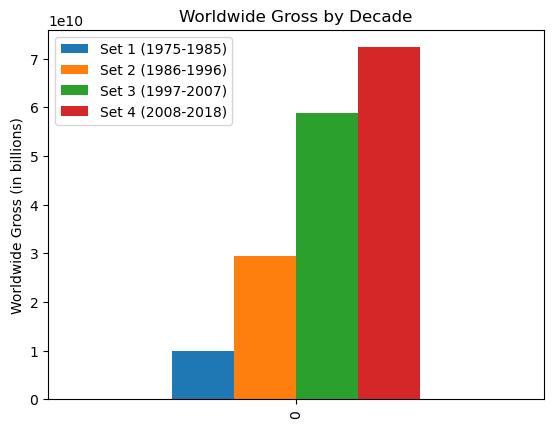

In [19]:
#make a bar chart to display the worldwide gross data to make sure the data is seen
ax = sums_df.plot(kind='bar')

# Set the chart title
ax.set_title('Worldwide Gross by Decade')

# Set the xticks and xticklabels properties of the axis to label each bar
ax.set_xticks(range(len(sums_df)))

ax.set_ylabel('Worldwide Gross (in billions)')

# Show the chart
plt.show()

In [20]:
#sort the movies into bins based on the release year and add a column with that new label
# Define the bin edges and labels
bins = [1975, 1986, 1997, 2008, 2019]
labels = ['1975-1985', '1986-1996', '1997-2007', '2008-2018']

# Create a new column in the DataFrame containing the bin labels
clean_df['Year_Bin'] = pd.cut(clean_df['Year'], bins=bins, labels=labels, include_lowest=True)



In [21]:
# Print the genre count for the whole df
clean_df['Main Genre'].value_counts()

Thriller     63
Comedy       55
Fantasy      54
Sci-Fi       50
Romance      48
Action       30
Drama        30
Animation    22
Crime        17
Family       16
Adventure    13
War          10
Music         9
Horror        8
Sport         7
History       5
Name: Main Genre, dtype: int64

In [22]:
# Filter the DataFrame by the desired bin
bin_data = clean_df[clean_df['Year_Bin'] == '2008-2018']

#count up the number of movies in each genre for this decade
bin_data=bin_data['Main Genre'].value_counts()
bin_data_df=pd.DataFrame(bin_data)
# Reset index and rename column
bin_data_df = bin_data_df.reset_index().rename(columns={'index': 'Main Genre', 'Main Genre': 'Count'})

bin_data_df

,Main Genre,Count
0,Action,27
1,Sci-Fi,17
2,Fantasy,17
3,Animation,14
4,Comedy,11
5,Thriller,8
6,Music,2
7,Horror,1
8,Romance,1
9,Adventure,1


<function matplotlib.pyplot.show(close=None, block=None)>

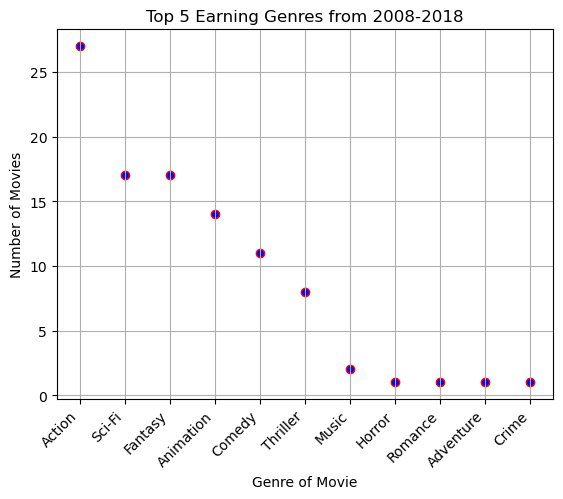

In [38]:
#make a scatter plot to show the number of movies in this decade 2008-2018

x_values = bin_data_df['Main Genre']
y_values = bin_data_df['Count']
plt.grid()
plt.xlabel('Genre of Movie')
plt.ylabel('Number of Movies')
plt.title('Top 5 Earning Genres from 2008-2018')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='r', alpha=1.0)
# Adjust x-axis label spacing
plt.xticks(rotation=45, ha='right')

plt.show

In [30]:
#use groupby() to find the genre count for movies in each decade
one_group = clean_df.groupby(['Year_Bin', 'Main Genre'])
one_count = one_group.count()

#find the top 5 genres of movies 1975-2018
count_df=pd.DataFrame(one_count)
count_df.sort_values(by='Year_Bin', ascending=False).iloc[:5,:]

top_5 = count_df.apply(lambda x: x.nlargest(5)).reset_index()
print(top_5)

    Year_Bin Main Genre  IMDB Rating  Length  Rank In Year  Rating  \
0  1986-1996   Thriller           27      27            27      27   
1  2008-2018     Action           27      27            27      27   
2  1997-2007    Fantasy           23      23            23      23   
3  1975-1985    Romance           20      20            20      20   
4  1975-1985     Comedy           17      17            17      17   

   Production Studio  Movie Title  Worldwide Gross  Year  
0                 27           27               27    27  
1                 27           27               27    27  
2                 23           23               23    23  
3                 20           20               20    20  
4                 17           17               17    17  


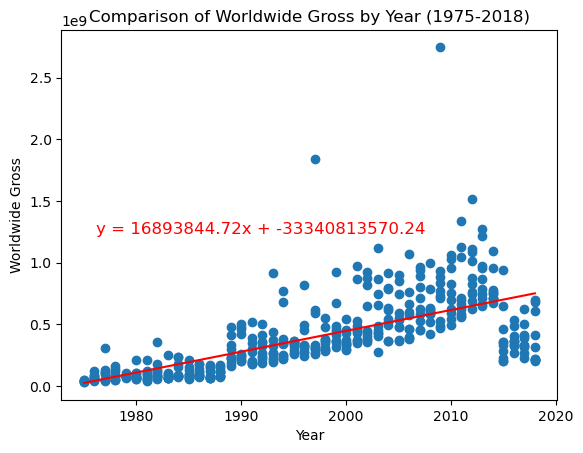

In [87]:
# Linear regression for earnings 1975-2018
x_values = clean_df["Year"]
y_values = clean_df["Worldwide Gross"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, xy=(0.07, 0.45), xycoords='axes fraction', fontsize=12, color='red')

plt.xlabel('Year')
plt.ylabel('Worldwide Gross')
plt.title('Comparison of Worldwide Gross by Year (1975-2018)')
plt.show()




In [80]:
#make a new DF with only Production company and worldwide gross
studio_data = clean_df.drop(columns=['Year_Bin', 'Main Genre', 'IMDB Rating', 'Length', 'Rank In Year', 'Rating', 'Movie Title', 'Year'])
studio_data

,Production Studio,Worldwide Gross
0,Walt Disney Pictures,"700,059,566.00"
1,Walt Disney Pictures,"678,815,482.00"
2,Pixar,"608,581,744.00"
3,Universal Pictures,"416,769,345.00"
4,20th Century Fox,"318,491,426.00"
...,...,...
432,Metro-Goldwyn-Mayer,"41,833,347.00"
433,Columbia Pictures,"39,000,000.00"
434,Walt Disney Pictures,"36,853,000.00"
435,Columbia Pictures,"35,000,000.00"


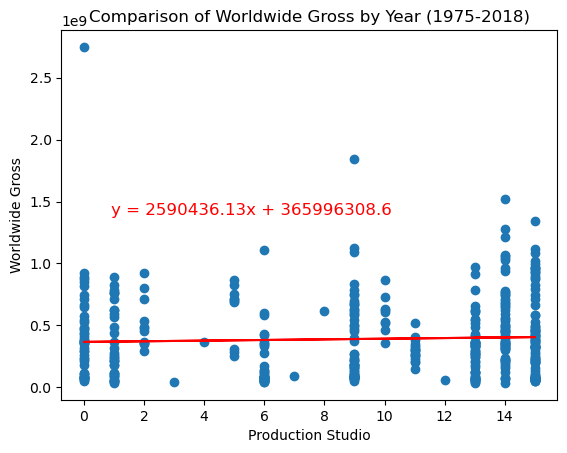

In [84]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to the 'Production Studio' column
le.fit(studio_data['Production Studio'])

# Transform the 'Production Studio' column into numerical values
studio_data['Production Studio Encoded'] = le.transform(studio_data['Production Studio'])

# Linear regression for earnings by Production Studio 1975-2018
x_values = studio_data["Production Studio Encoded"]
y_values = studio_data["Worldwide Gross"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0.1, 0.5), xycoords='axes fraction', fontsize=12, color='red')
plt.xlabel('Production Studio')
plt.ylabel('Worldwide Gross')
plt.title('Comparison of Worldwide Gross by Year (1975-2018)')
plt.show()
